## 1. Google Play Store apps and reviews

<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in dataset
apps =pd.read_csv("apps.csv")

### Assessing

In [3]:
#assessing the dataset
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
#summary of the data set
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
Unnamed: 0        9659 non-null int64
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null int64
Size              8432 non-null float64
Installs          9659 non-null object
Type              9659 non-null object
Price             9659 non-null object
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null object
Current Ver       9651 non-null object
Android Ver       9657 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [5]:
#checking for null values
apps.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [6]:
#checking for duplicated values
apps.duplicated().sum()

0

In [7]:
#entries where the rating is null
apps[apps.Rating.isnull()]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,07-Mar-18,1.0.0,4.1 and up
113,113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7,"100,000+",Free,0,Everyone 10+,Beauty,20-Sep-17,8,3.0 and up
123,123,Manicure - nail design,BEAUTY,NaN,119,3.7,"50,000+",Free,0,Everyone,Beauty,23-Jul-18,1.3,4.1 and up
126,126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4,"100,000+",Free,0,Teen,Beauty,17-Jul-18,1.15,4.1 and up
129,129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9,"10,000+",Free,0,Mature 17+,Beauty,08-Aug-17,2,2.3 and up
130,130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1,"10,000+",Free,0,Everyone 10+,Beauty,11-Dec-17,2,3.0 and up
134,134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9,"10,000+",Free,0,Mature 17+,Beauty,24-Jan-18,3,3.0 and up
163,163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7,"10,000+",Free,0,Everyone,Books & Reference,13-Jul-18,1,2.3 and up
180,180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2,"50,000+",Free,0,Everyone,Books & Reference,15-Jun-18,3,6.0 and up
185,185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3,"100,000+",Free,0,Everyone,Books & Reference,07-Aug-15,1.1,5.1 and up


In [8]:
#entries where the Size is null
apps[apps.Size.isnull()]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,"5,000,000+",Free,0,Everyone,Art & Design,14-Jul-18,Varies with device,2.3.3 and up
42,42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,"10,000,000+",Free,0,Everyone,Art & Design,30-Jul-18,Varies with device,Varies with device
52,52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,NaN,"1,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
67,67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,NaN,"5,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
68,68,REPUVE,AUTO_AND_VEHICLES,3.9,356,NaN,"100,000+",Free,0,Everyone,Auto & Vehicles,25-May-18,Varies with device,Varies with device
73,73,PDD-UA,AUTO_AND_VEHICLES,4.8,736,NaN,"100,000+",Free,0,Everyone,Auto & Vehicles,29-Jul-18,2.9,2.3.3 and up
85,85,CarMax – Cars for Sale: Search Used Car Inventory,AUTO_AND_VEHICLES,4.4,21777,NaN,"1,000,000+",Free,0,Everyone,Auto & Vehicles,04-Aug-18,Varies with device,Varies with device
88,88,AutoScout24 Switzerland – Find your new car,AUTO_AND_VEHICLES,4.6,13372,NaN,"1,000,000+",Free,0,Everyone,Auto & Vehicles,03-Aug-18,Varies with device,Varies with device
89,89,Zona Azul Digital Fácil SP CET - OFFICIAL São ...,AUTO_AND_VEHICLES,4.6,7880,NaN,"100,000+",Free,0,Everyone,Auto & Vehicles,10-May-18,4.6.5,Varies with device
92,92,Fuelio: Gas log & costs,AUTO_AND_VEHICLES,4.6,65786,NaN,"1,000,000+",Free,0,Everyone,Auto & Vehicles,02-Aug-18,Varies with device,4.0.3 and up


## 2. Data cleaning

In [9]:
# dropping the Unecessary column- Unnamed: 0
apps.drop('Unnamed: 0',inplace=True,axis=1)

> The dataset contains Installs and Size column where the entries are recorded with characters like +,$,etc. These characters have to be removed for further analysis

In [10]:
# List of characters to remove
chars_to_remove = ['+',',','$']
# List of column names to clean
cols_to_clean = ['Installs','Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col]) 

In [11]:
#checking the dataframe
apps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up


In [12]:
#checking the datatypes of the columns
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null int64
Size              8432 non-null float64
Installs          9659 non-null int64
Type              9659 non-null object
Price             9659 non-null float64
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null object
Current Ver       9651 non-null object
Android Ver       9657 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 981.1+ KB


> The datatypes for Install and Size columns have beend changed. Hence changes made were successful in the dataframe.

In [13]:
#Converting the datatype of Last Updated column to datetime object
apps['Last Updated']=pd.to_datetime(apps['Last Updated'])

In [14]:
apps.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up


## 3. Exploring app categories

<p>Questions to be investigated:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>


In [20]:
#importing plotly and cufflinks
import plotly
from plotly import __version__
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot
init_notebook_mode(connected=True)

#### Plot 1: Category Distribution

In [21]:
#Plot 1: Category Distribution
apps.Category.value_counts().sort_values(ascending=False).iplot(kind='bar',xTitle='Category',yTitle='Counts',title='Category Distribution')

> It is clear from the graph above that **FAMILY** category records the highest number of apps followed by category **GAME** and **TOOLS**.

> Also it can be seen on the opposite side, categories like : **BEAUTY** , **COMICS**, **PARENTING** ,etc. have few apps.

## 4. Distribution of app ratings

#### Plot 2: Rating Distribution

In [115]:
avgRating=apps.Rating.mean() #calculating the average Rating of the apps
apps.Rating.iplot(kind='hist',xTitle='Ratings',yTitle='Counts',title='Rating distribution',colors='Blue',shapes={
              'type' :'line',
              'x0': avgRating,
              'y0': 0,
              'x1': avgRating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          })

> From our research, we found that the average volume of ratings across all app categories is <code>4.17</code>. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps

## 5. Size and price of an app

Questions that are to be explored: 

Does the size of an app affect its rating? 

Do users really care about system-heavy apps or do they prefer light-weighted apps?

Does the price of an app affect its rating? 

Do users always prefer free apps over paid apps?


In [135]:
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [120]:
# Filter rows where both Rating and Size values are not null
appswithRS= apps[(~apps.Rating.isnull()) & (~apps.Size.isnull())]

In [133]:
# Subset for categories with at least 250 apps
largedf = appswithRS.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

In [129]:
largedf

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,839,Citibanamex Movil,FINANCE,3.6,52306,42.0,5000000,Free,0.00,Everyone,Finance,2018-07-27,20.1.0,5.0 and up
1,841,KTB Netbank,FINANCE,3.8,42644,19.0,5000000,Free,0.00,Everyone,Finance,2018-06-28,8.18,4.2 and up
2,842,Mobile Bancomer,FINANCE,4.2,278082,70.0,10000000,Free,0.00,Everyone,Finance,2018-07-30,10.78,4.0.3 and up
3,843,Nedbank Money,FINANCE,4.2,6076,32.0,500000,Free,0.00,Everyone,Finance,2018-07-28,4.1.1-0-prod,4.2 and up
4,844,SCB EASY,FINANCE,4.2,112656,93.0,5000000,Free,0.00,Everyone,Finance,2018-07-19,3.9.0,4.1 and up
5,848,Itau bank,FINANCE,4.2,957973,40.0,10000000,Free,0.00,Everyone,Finance,2018-07-30,6.5.7,4.2 and up
6,849,Nubank,FINANCE,4.7,130582,24.0,5000000,Free,0.00,Everyone,Finance,2018-08-02,Varies with device,Varies with device
7,851,IKO,FINANCE,4.7,167168,20.0,1000000,Free,0.00,Everyone,Finance,2018-07-04,3.115.27,4.1 and up
8,852,Cash App,FINANCE,4.0,34428,15.0,10000000,Free,0.00,Everyone,Finance,2018-08-02,2.31.1,5.0 and up
9,853,Standard Bank / Stanbic Bank,FINANCE,3.6,15247,28.0,1000000,Free,0.00,Everyone,Finance,2018-07-13,3.0.5,4.0.3 and up


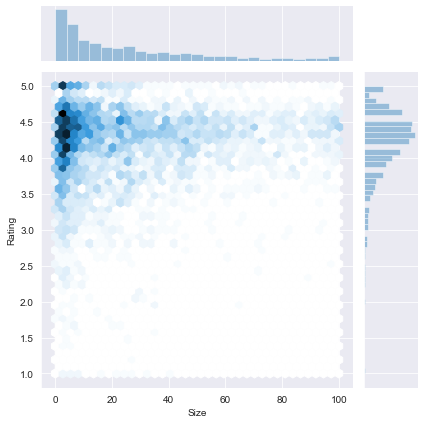

In [138]:
# Plot size vs. rating
plot1 = sns.jointplot(x = largedf.Size, y = largedf.Rating, kind = 'hex')

> We can see that apps with small <code>Size</code> have high number of ratings and that too above avegrage rating.

In [140]:
# Subset apps whose 'Type' is 'Paid'
paidapps = appswithRS.query('Type=="Paid"')

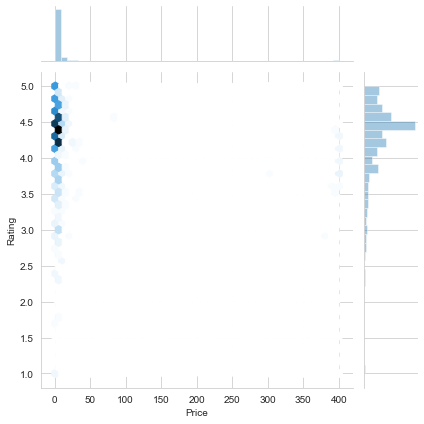

In [254]:
# Plot price vs. rating
plot2 = sns.jointplot(data=paidapps,x ='Price', y ='Rating',kind='hex')

> We can see that apps with low <code>Price</code> have high number of ratings and that too above avegrage rating.

## 6. Relation between app category and app price


In [143]:
# Selecting few popular app categories
popapps = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

Text(0.5, 1.0, 'App pricing across categories')

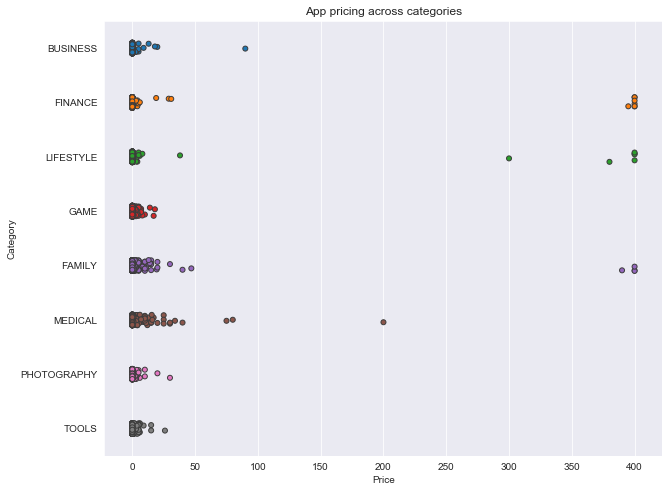

In [165]:
fig, ax = plt.subplots(figsize=(10,8))
# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(data=popapps,x='Price', y='Category', jitter=True, linewidth=1)
ax.set_title('App pricing across categories')

 We can see there are few very expensive apps (priced around $$ 400). We need to check for the apps priced greater than $200

In [166]:
# Apps whose Price is greater than 200
appsabove200=popapps[['Category', 'App', 'Price']][popapps.Price > 200]
appsabove200

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


> It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose.

## 7. Filter out "junk" apps

Let's filter out these junk apps and re-do our visualization.

In [ ]:
#Select apps priced below $100
appsbelow100 = popapps[popapps.Price<100]

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

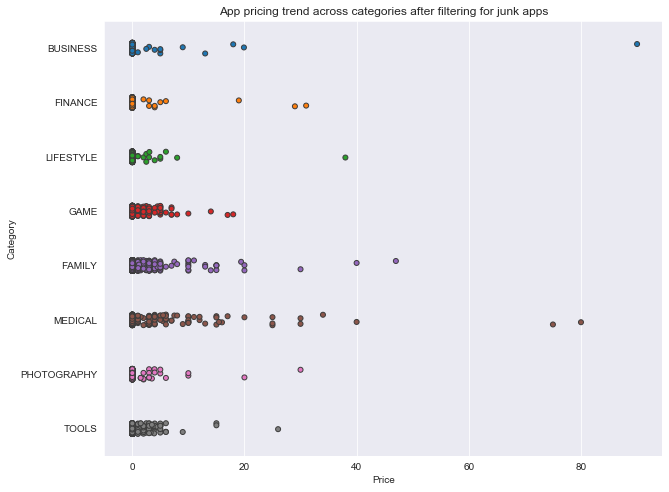

In [175]:
fig, ax = plt.subplots(figsize=(10,8))
#Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price',y='Category',data=appsbelow100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

> Now we can see that trend with genuine apps. MEDICAL and FAMILY category apps records high price wrt to other category apps

## 8. Popularity of paid apps vs free apps


<p>Are paid apps installed as much as free apps?

In [177]:
import plotly.graph_objs as go

In [260]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid')

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free')

layout = go.Layout(title = "Number of downloads of paid apps vs. free apps",
                    yaxis = dict(type = 'log',autorange = True))

# Add trace0 and trace1 to a list for plotting
data = [trace1,trace0]
plotly.offline.iplot({'data': data, 'layout': layout})

> It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not much

## 9. Sentiment analysis of user reviews


In [261]:
# Load user_reviews.csv
reviews =pd.read_csv('user_reviews.csv')

In [222]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [262]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [226]:
#dropping the Nan values in 'Translated_Review','Sentiment' columns
reviews.dropna(subset=['Translated_Review','Sentiment'],inplace=True)

In [227]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [228]:
# Join and merge the two dataframe
mergedapps = pd.merge(apps, reviews, on = 'App', how = "inner")

In [229]:
mergedapps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

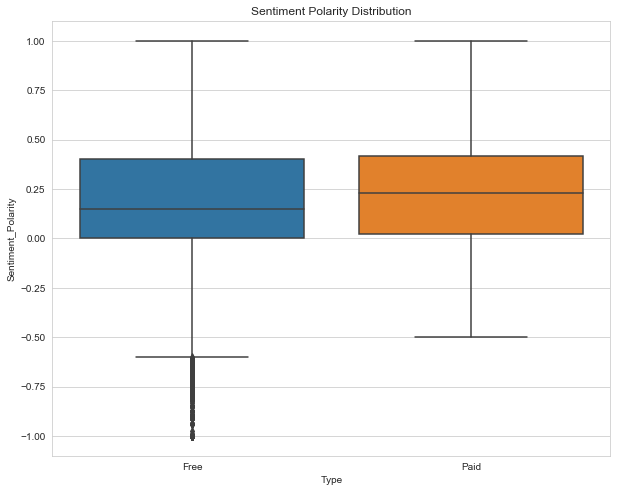

In [238]:
# User review sentiment polarity for paid vs. free apps
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.boxplot(x='Type', y ='Sentiment_Polarity',data=mergedapps)
ax.set_title('Sentiment Polarity Distribution')

> By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average.